<a href="https://colab.research.google.com/github/salveru-manasa/assignment_UNP_5september2021/blob/main/Copy_of_pythonproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE REQUIRED CSV FILE

In [11]:
from google.colab import files
uploaded = files.upload()

Saving autompg.csv to autompg.csv


IMPORTING REQUIRED LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import collections
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import statsmodels as sm
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import test


In [12]:
Null_values=('?')
data=pd.read_csv("autompg.csv",na_values=Null_values)

CALLING 5 ROWS OF THE DATASET

In [14]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# **GETTING** COMPLETE INFORMATION OF THE DATA(BEFORE ASSIGNING NULL VALUES)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
 8   country_name  398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


CODE TO GET THE COUNT OF NULL VALUES IN A COLUMN

In [40]:
data['horsepower'].isna().sum()

0

DESCRIPTIVE ANALYSIS OF THE DATA

In [41]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [42]:
data.shape

(398, 9)

In [43]:
data.horsepower.unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

CODE FOR GETTING THE MEAN OF HORSEPOWER COLUMN IN DATA

In [44]:
data.horsepower.mean()

104.46938775510206

ASSIGNING  NULL VALUES OF HORSEPOWER WITH MEAN OF THE HORSEPOWER COLUMN  

In [45]:
data.horsepower.fillna(data.horsepower.mean(),inplace=True)

In [46]:
data.head(40)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,country_name
0,18.0,8,307.0,130.000000,3504,12.0,70,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.000000,3693,11.5,70,buick skylark 320,USA
2,18.0,8,318.0,150.000000,3436,11.0,70,plymouth satellite,USA
3,16.0,8,304.0,150.000000,3433,12.0,70,amc rebel sst,USA
4,17.0,8,302.0,140.000000,3449,10.5,70,ford torino,USA
5,15.0,8,429.0,198.000000,4341,10.0,70,ford galaxie 500,USA
6,14.0,8,454.0,220.000000,4354,9.0,70,chevrolet impala,USA
7,14.0,8,440.0,215.000000,4312,8.5,70,plymouth fury iii,USA
8,14.0,8,455.0,225.000000,4425,10.0,70,pontiac catalina,USA
9,15.0,8,390.0,190.000000,3850,8.5,70,amc ambassador dpl,USA


GETTING COMPLETE INFORMATION OF THE DATA
AFTER ASSIGNING THE NULL VALUES

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
 8   country_name  398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [48]:
data.horsepower.mean()

104.46938775510206

ASSIGNING COUNTRY NAMES BASED ON THE ORIGIN OF THE DATA

In [85]:
data['country_name']=data.replace([1,2,3],['USA','EUROPE','JAPAN'])
data['country_name']=data.replace([1,2,3],['USA','EUROPE','JAPAN'])

In [77]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,country_name
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,18
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,15
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,18
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,16
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,17


In [54]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


PLOTTING ATTRIBUTES OF THE DATA WITH RESPECT TO THE ATTRIBUTE MPG

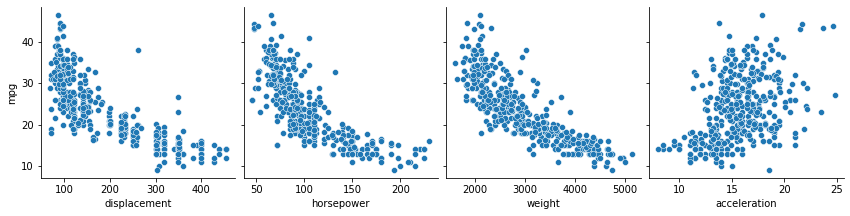

In [55]:
sns.pairplot(data,x_vars=['displacement','horsepower','weight','acceleration'],y_vars='mpg',height=3,aspect=1)


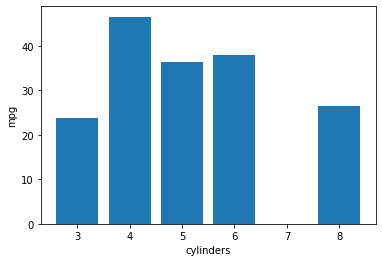

In [56]:
plt.bar(x=data['cylinders'],
        height=data['mpg'])
plt.xlabel("cylinders")
plt.ylabel("mpg")
     
plt.show()

Text(0, 0.5, 'MPG')

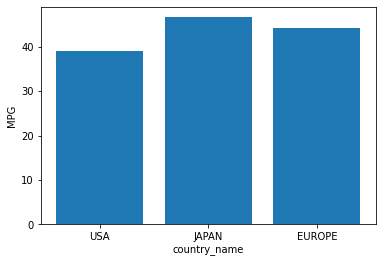

In [57]:
plt.bar(x=data['country_name'],
        height=data['mpg'])
plt.xlabel("country_name")
plt.ylabel("MPG")

In [58]:
data["car name"].value_counts()

ford pinto             6
ford maverick          5
toyota corolla         5
amc matador            5
peugeot 504            4
                      ..
bmw 320i               1
dodge colt hardtop     1
ford mustang gl        1
pontiac safari (sw)    1
audi 5000              1
Name: car name, Length: 305, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


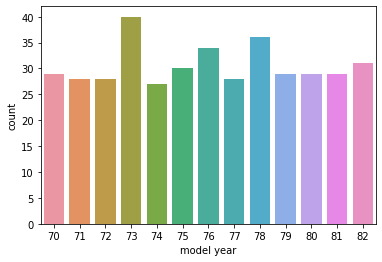

In [59]:
sns.countplot(data["model year"])

FINDING CORRELATION BETWEEN THE ATTRIBUTES

In [60]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


Text(0.5, 1.0, 'Heatmap displaying the relationship between the attributes of the data')

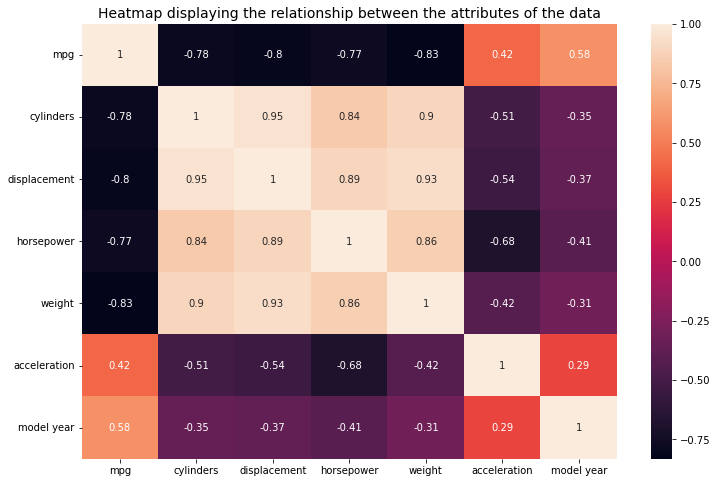

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.title('Heatmap displaying the relationship between the attributes of the data',fontsize=14)

FITTING A LINEAR REGRESSION MODEL

ASSIGNING DATA TO THE NEW VARIABLE BY REMOVING OBJECTIVE COLUMNS 

In [63]:
newdata=data.drop(['car name','country_name'],axis=1)

In [64]:
X=newdata.drop('mpg',axis=1)
Y=newdata.mpg

In [65]:
X_scaled=preprocessing.scale(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,train_size=0.7,test_size=0.3,random_state=0)

In [66]:
model=LinearRegression()
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [67]:
model.fit(X_train,Y_train)

LinearRegression()

IMPORTING REQUIRED LIBRARIES TO FIT LINEAR REGRESSION

In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [69]:
import statsmodels.api as sm
m=sm.OLS(Y_train,X_train)
m=m.fit()
print(m.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.061    
Dependent Variable:     mpg              AIC:                         2558.3181
Date:                   2021-12-28 15:43 BIC:                         2580.0838
No. Observations:       278              Log-Likelihood:              -1273.2  
Df Model:               6                F-statistic:                 3.999    
Df Residuals:           272              Prob (F-statistic):          0.000745 
R-squared (uncentered): 0.081            Scale:                       568.70   
----------------------------------------------------------------------------------
                    Coef.     Std.Err.       t       P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cylinders           3.0204      4.6251     0.6530    0.5143     -6.0852    12.1260
displacement       -2.6857      6.3718    -0.4215   

PREDICTING MPG VALUES

In [70]:
linear_prediction=model.predict(X_test)
print("train score:{}\n".format(model.score(X_train,Y_train)))
print("test score:{}\n".format(model.score(X_test,Y_test)))
print("overall model accuracy:{}\n".format(r2_score(Y_test,linear_prediction)))
print("mean squared error:{}\n".format(mean_squared_error(Y_test,linear_prediction)))

train score:0.8064770604200187

test score:0.8066396544567368

overall model accuracy:0.8066396544567368

mean squared error:12.356090107920608



In [71]:
import math
rmse=math.sqrt((mean_squared_error(Y_test,linear_prediction)))
print("Root mean square error:",rmse)

Root mean square error: 3.5151230572940984


In [72]:
model.coef_

array([-0.25574406,  0.86526188, -0.29663133, -5.68106499,  0.44715614,
        2.77364436])

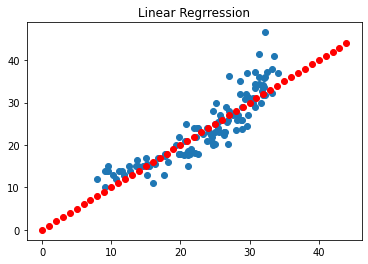

In [73]:

fig,ax=plt.subplots()
ax.scatter(linear_prediction,Y_test)
plt.scatter(np.arange(0,45),np.arange(0,45),color='red')
plt.title("Linear Regrression")
plt.show()

In [74]:
a=pd.DataFrame({'Actual':Y_test,'predict':linear_prediction})
a

,Actual,predict
65,14.0,12.719467
132,25.0,24.986308
74,13.0,11.792174
78,21.0,20.695277
37,18.0,17.747687
...,...,...
236,25.5,25.505093
352,29.9,31.661360
92,13.0,11.859878
221,17.5,17.746111


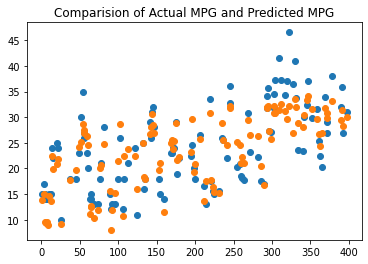

In [75]:
plt.title('Comparision of Actual MPG and Predicted MPG')
plt.scatter(a.index,a.Actual.values)
plt.scatter(a.index, a.predict.values)
plt.show()